# Group 5: Coronary Heart Disease
Rion Askin, Brad Hall, Justin Holmes

#### Package Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score



Our team will be utilizing the heart disease csv (data frame = **df_chd**) located at here: <br>
https://moodle.lsu.edu/pluginfile.php/2211452/mod_folder/content/0/heartdisease.csv?forcedownload=1

The data will be used to build a model that predicts coronary heart disease ten year risk using uncommon predictors (predictors a basic Framingham Risk Score do not utilize). 

**Initial Observations**<br>

The data that we are using is described below by using the shape, isnull, infor, head, and tail method. From the outputs, we observed that all of the data values were properly read by python. However, there are quite a few missing values for the predictors that we want to include in the model. We have created a copy of our original data before any true wrangling has begun.<br> The first task is for the missing values to be replaced. We will then ensure proper and meaningful column names are in place and ensure uniformity within our data.

In [54]:
df_chd = pd.read_csv('heartdisease.csv')

In [55]:
df_chd_copy = df_chd

In [56]:
df_chd.shape

(4238, 16)

In [57]:
df_chd.isnull().sum()
#7 columns missing data values

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [58]:
df_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [59]:
df_chd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [60]:
df_chd.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


#### Missing Values

**education**<br>
There are four educational levels for our data set representing the culmination of the education for the individual in the data set. High school, Bachelor's, Master's, and Doctorate. The average education from the data yielded sn average education = 1.9789, rounded to **2** to represent a bachelor's educational level. It should be noted that the US average is a high school degree.

In [61]:
#average education
avg_education = df_chd['education'].mean(axis=0) 
rounded_avg_education = avg_education.round(1)
#print(rounded_avg_education)

#replace NaN with average
df_chd['education'].replace(np.nan, rounded_avg_education, inplace=True)

**cigsPerDay**<br>
Cigarettes per day is an arbitrary rate, so we have transformed the values to Z scores to be able to properly and statistically assess the amount of cigarettes that an individual may partake. The mean values were calculated for the column and then rounded. Then Z scores replaced the original values. These values were not rounded to reduce any potential rounding error when building the model.

In [62]:
#average cigarettes per day
avg_cigsPerDay = df_chd['cigsPerDay'].mean(axis=0) 
#print(rounded_avg_cigsPerDay)

#replace NaN with average 
df_chd['cigsPerDay'].replace(np.nan, avg_cigsPerDay, inplace=True)

In [63]:
#Z = (x-mean)/standard deviation
#Replace the present values with the calculated Z scores

x = df_chd['cigsPerDay']
u = df_chd['cigsPerDay'].mean()
std = df_chd['cigsPerDay'].std()

df_chd['cigsPerDay'] = (df_chd['cigsPerDay']-u)/std

#confirm replace NaN with Z scores 
#df_chd.head()

**BPMeds**<br>
Blood Pressure Medicine is another dummy coded column. The decision was to replace the missing values with the highest frequency because the average would not yield any information that is helpful. 

In [64]:
#frequency
BPMeds_Max_Freq = df_chd['BPMeds'].value_counts().idxmax() 

df_chd['BPMeds'].replace(np.nan, BPMeds_Max_Freq, inplace=True)

#df_chd.head()

**totChol**<br>
According to Johns Hopkins' health system, to have a total cholestorol level less than 200 mg/dL puts a person in the normal range for the general population of adults. To have a totoal cholestorol level of 200 to 230 mg/dL places an individual in the borderline high category.

After analyzing the frequency of the total cholestorol series, the value the highest frequency is 240 mg/dL and the average is about 237 mg/dL. The missing values for this column will be replaced by the average to account for all of the values within the data set.This indicates that the average cholestorol levels for our population are **borderline high**.

In [65]:
#frequency of total cholestorol
#df_chd.totChol.value_counts()

avg_totChol = df_chd['totChol'].mean(axis = 0)
round_avg_totChol = avg_totChol.round(0)
#print(round_avg_totChol)

#replace NaN with average
df_chd['totChol'].replace(np.nan, round_avg_totChol, inplace=True)

**BMI**<br>
At first glance, Body Mass Index has values that have potentially high leverage or high influence on the data. The initial idea was to replace the missing values with the highest frequency, however we created a distribution chart of the BMI values to visually compute the normality of the data. It can be seen in the chart, BMI Bins, that the data is decently normal, a bit right skewed. The decision was made to use the average BMI of **25.8 or Overweight**. According to the CDC, the average adult BMI falls around 26.5/26.6. 

*Note: With BMI, this measure does not account for cultural trends of weight distribution.

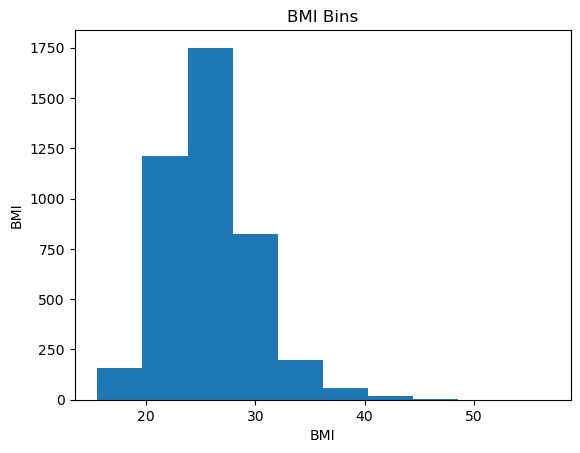

In [66]:
#Analyze the distribution of the BMI values
%matplotlib inline 
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df_chd['BMI'])

# set x/y labels and plot title
plt.pyplot.xlabel('BMI')
plt.pyplot.ylabel('BMI')
plt.pyplot.title('BMI Bins')

#Avergae BMI
avg_BMI = df_chd['BMI'].mean(axis=0)
#print(avg_BMI.round(1))

#replace NaN with average
df_chd['BMI'].replace(np.nan, avg_BMI.round(1), inplace=True)

**heartRate**<br>
According to the American Heart Association, the average heart rate is around 60 to 100 beats per minute. The average heart rate for our data is **76 beats/min**. The values that are missing were replaced with the average in our dataset, which is a normal United States heart rate.

In [67]:
avg_heartRate = df_chd['heartRate'].mean(axis=0) 
#print(avg_heartRate.round())

#replace NaN with average 
df_chd['heartRate'].replace(np.nan, avg_heartRate.round(0), inplace=True)

**glucose**<br>
According to the Cleveland Clinic, normal glucose levels for someone without diabetes fall between 70 to 90 mg/dL. The average glucose level determined by the individuals in our data set is 81.9668, a normal glucose reading. The rounded value of **82** will be used to replace the missing values within the data set.

In [68]:
avg_glucose = df_chd['glucose'].mean(axis=0)
round_avg_glucose = avg_glucose.round(0)
#print(round_avg_glucose)

#replace NaN with rounded average
df_chd['glucose'].replace(np.nan, round_avg_glucose, inplace=True)

**Rename Column**<br>
The column male was renamed to sex for standard purposes. The value of 0 = male and the 1 = female. The data was then checked to ensure that the changes were applied to the data frame.

In [69]:
df_chd.rename(columns={'male': 'sex'}, inplace=True)

#Ensure that changes have been applied to the data set
df_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


**Data Visualization**

The statistical analysis that we are privy to through Dr. Shreve cannot be properly used in this set because we have not fit an initial model to our data yet. The visualizations that will create the most meaning to understanding the data and to further the build of a model would be a historgram (initial outlier determination) and a scatterplot matrix to get a peek into our predictors of interest and their correlations.

Using seaborn, our distributions were created for the variables that our group have interest and that are not dummy coded (binary). From our normal distributions in the scatter matrix below, BMI, glucose, and maybe diastolic blood pressure have a distribution that appears to be normal. The values show that this is good data and the population is one that is normal. The age variable has a distribution that shows the data relies heavily on a particular age group and does not have the even split that would ensure the reliability of the model that we create. This variable will possibly have to be further transformed to help the model. The cigsPerDay distribution shows a large spike of smoker habits. Again, though the column was standardized, it must be further transformed to have real meaning on the data.<br>
The scatter matrix also shows us tthat glucose has potentially high correlation with the other variables due to the lower density elipses. Simply eyeballing, glucose may be a predictor that propels the model forward in understandin ghow to predict HD with the lesser used variables. 

AttributeError: module 'matplotlib' has no attribute 'show'

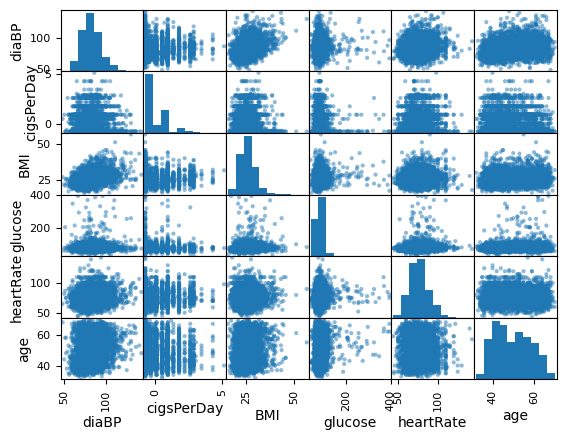

In [70]:
#predictors of interest that are not dummy coded
scatter_matrix = pd.plotting.scatter_matrix(df_chd[['diaBP','cigsPerDay','BMI','glucose','heartRate','age']], alpha=0.5)
plt.show()

**Split the Data**

After all of the transformations have been made, we have created a test set of our model to be able to test our data on once our model has been created. The industry standard for smaller datasets appears to be 60/40 to 70/30 train/test.So for a 4000 record set, we have opted to use 70/30.

In [ ]:
y = df_chd.TenYearCHD
x = df_chd[['education','cigsPerDay','BPMeds','prevalentHyp','prevalentStroke','diaBP', 'BMI','glucose']]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=58)

In [ ]:

# Create a linear regression object
linear_model = LinearRegression()

# Fit the model using the training data
linear_model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = linear_model.predict(X_test)

# Calculate the R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)

In [71]:
# Define a threshold for classification
threshold = 0.5

# Convert the continuous predictions to binary classes based on the threshold
y_pred_class = [1 if value > threshold else 0 for value in y_pred]

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Compute the accuracy score
acc_score = accuracy_score(y_test, y_pred_class)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", acc_score)

Confusion Matrix:
[[1078    1]
 [ 188    5]]
Accuracy Score: 0.8514150943396226
